# **Project Die Walküre (Multivariable Regression) ** 

## Load Data


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/DialecticalJuche1912/renting-info.csv/main/renting-data.csv')
df 

<ipython-input-1-977c47a8d36f>:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/DialecticalJuche1912/renting-info.csv/main/renting-data.csv')


,REF_DATE,GEO,DGUID,Type of structure,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v42135513,192.3.1,NaN,..,NaN,NaN,0
1,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,One bedroom units,Dollars,81,units,0,v42135529,192.3.2,NaN,..,NaN,NaN,0
2,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Two bedroom units,Dollars,81,units,0,v42135545,192.3.3,NaN,..,NaN,NaN,0
3,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Three bedroom units,Dollars,81,units,0,v42135561,192.3.4,NaN,..,NaN,NaN,0
4,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row structures of three units and over,Bachelor units,Dollars,81,units,0,v42135577,192.2.1,NaN,..,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119027,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of three units and over,Three bedroom units,Dollars,81,units,0,v3824416,188.1.4,2095.0,NaN,NaN,NaN,0
119028,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of six units and over,Bachelor units,Dollars,81,units,0,v3824602,188.4.1,1234.0,NaN,NaN,NaN,0
119029,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of six units and over,One bedroom units,Dollars,81,units,0,v3824790,188.4.2,1555.0,NaN,NaN,NaN,0
119030,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of six units and over,Two bedroom units,Dollars,81,units,0,v3824978,188.4.3,1801.0,NaN,NaN,NaN,0


## Data Cleaning 

In [2]:
# Returning the row columns for this dataset
dir(df)
print(dir(df)[:15])

['COORDINATE', 'DECIMALS', 'DGUID', 'GEO', 'REF_DATE', 'SCALAR_FACTOR', 'SCALAR_ID', 'STATUS', 'SYMBOL', 'T', 'TERMINATED', 'UOM', 'UOM_ID', 'VALUE', 'VECTOR']


In [3]:
# dropping incomplete data 
complete_df = df.dropna(subset=['Type of unit', 'VALUE'])
# dropping unrelated columns 
complete_df_1 = complete_df[['REF_DATE', 'Type of unit', 'VALUE']]
# Replacing string row value under column Type of unit with integers 
replaced_df = complete_df_1.replace(['Bachelor units','One bedroom units',
                                     'Two bedroom units','Three bedroom units']
                                    , [1,1,2,3])
replaced_df
# rename unit column 
clean_df = replaced_df.rename(columns={"Type of unit":"Number of units"})
clean_df 

,REF_DATE,Number of units,VALUE
34,1987,2,480.0
49,1987,1,370.0
50,1987,2,414.0
51,1987,3,414.0
69,1987,1,254.0
...,...,...,...
119027,2021,3,2095.0
119028,2021,1,1234.0
119029,2021,1,1555.0
119030,2021,2,1801.0


### Variable sorting 

In [4]:
y0 = clean_df['VALUE']
y = y0[y0 != 0]
np.array(y)
z = clean_df['Number of units']
x = clean_df['REF_DATE']

In [5]:
x

34        1987
49        1987
50        1987
51        1987
69        1987
          ... 
119027    2021
119028    2021
119029    2021
119030    2021
119031    2021
Name: REF_DATE, Length: 64457, dtype: int64

In [6]:
# Actual rental price in dollars 
y 

34         480.0
49         370.0
50         414.0
51         414.0
69         254.0
           ...  
119027    2095.0
119028    1234.0
119029    1555.0
119030    1801.0
119031    2074.0
Name: VALUE, Length: 63545, dtype: float64

In [7]:
z  

34        2
49        1
50        2
51        3
69        1
         ..
119027    3
119028    1
119029    1
119030    2
119031    3
Name: Number of units, Length: 64457, dtype: int64

## Data Visualization

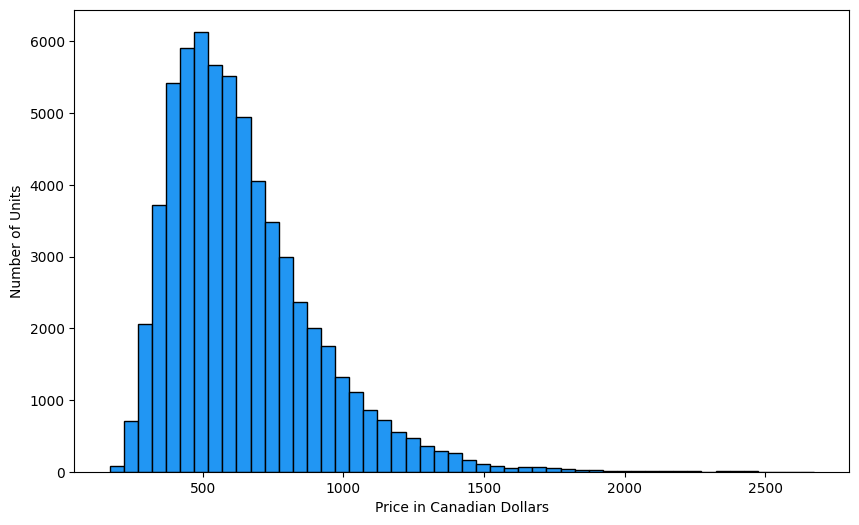

In [8]:
plt.figure(figsize=(10, 6))
plt.hist([np.array(y)], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in Canadian Dollars')
plt.ylabel('Number of Units')

plt.show()

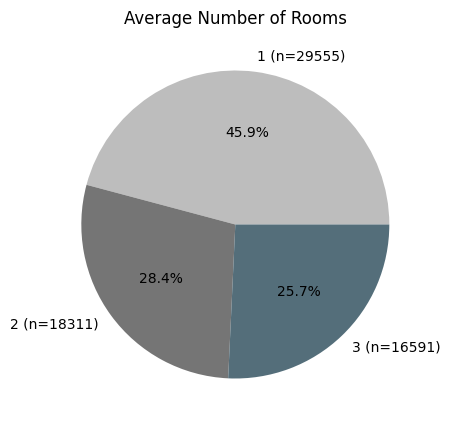

In [9]:
z_array = np.array(z)

# Calculate the frequencies
values, counts = np.unique(z_array, return_counts=True)

# Create labels that include the frequencies
labels = [f'{value} (n={count})' for value, count in zip(values, counts)]

plt.figure(figsize=(10, 5))

# Create the pie chart
plt.pie(counts, labels=labels, colors=['#BDBDBD', '#757575', '#546E7A'], autopct='%1.1f%%')

plt.title('Average Number of Rooms')

plt.show()

## Descriptive Statistics 

In [10]:
print(x.min())
print(x.max())
print(x.median()) # most of the data is from the recent 10-20 years 

1987
2021
2007.0


In [11]:
print(y.min())
print(y.max())
print(y.mean())
print(y.median())

169.0
2673.0
640.4714926430089
588.0


In [12]:
print(z.mean())
print(z.median())

1.798873667716462
2.0


## Correlation Testing

In [13]:
x.corr(y) # date in relation to value 

0.557407992511621

In [14]:
z.corr(y) # room in relation to value

0.4104671038052481

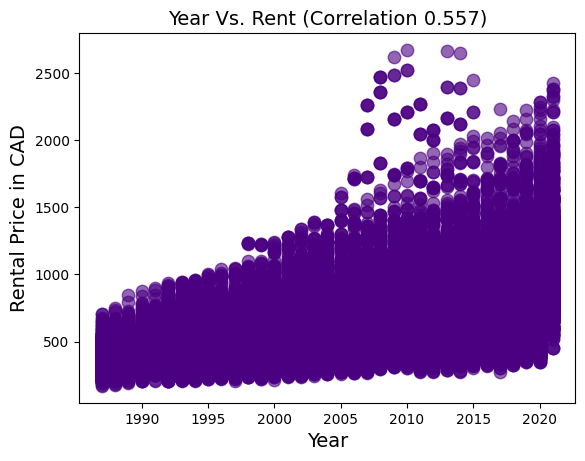

<Figure size 600x600 with 0 Axes>

In [16]:
min_size = min(x.size, y.size)

# Trim x and y to the size of the smallest array
x_trim = x[:min_size]
y_trim = y[:min_size]
pearsonr(x_trim, y_trim)
plt.title(f'Year Vs. Rent (Correlation {round((x.corr(y)), 3)})', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rental Price in CAD', fontsize=14)
plt.scatter(x=x_trim, y=y_trim, alpha=0.6, s=80, color='indigo')
plt.figure(figsize=(6,6))
plt.show()

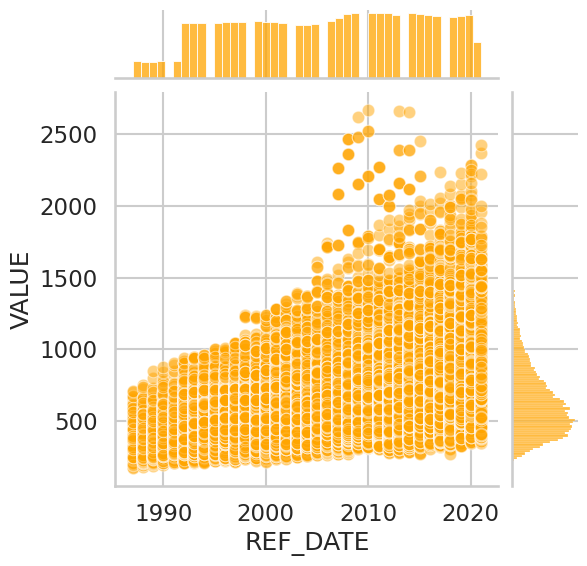

In [27]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=x_trim, y=y_trim, color='orange', joint_kws={'alpha': 0.5})
plt.show()

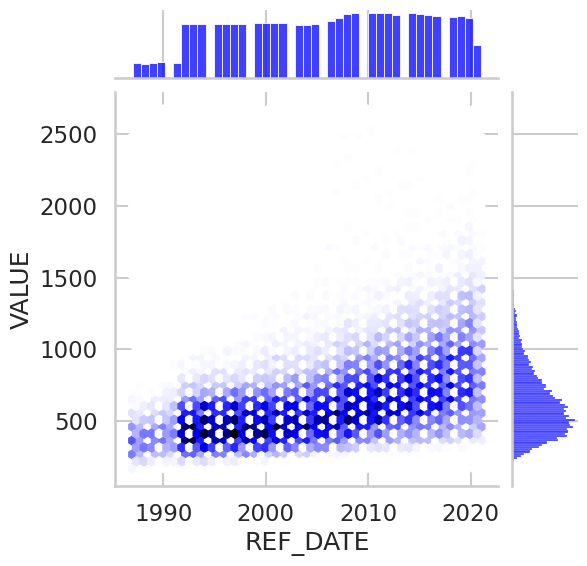

In [33]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=x_trim, y=y_trim, kind='hex', color='blue')
plt.show()

## Data Splitting


In [73]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_trim, y_trim, test_size = 0.25, 
                                                    random_state=100)

In [74]:
print(x_train)

26033     1994
49001     2001
62856     2005
72586     2008
63653     2005
          ... 
34087     1996
107888    2018
37691     1997
106117    2018
79507     2010
Name: REF_DATE, Length: 47658, dtype: int64


In [75]:
print(x_test)

45604     2000
66581     2006
50930     2001
117111    2021
58637     2003
          ... 
115992    2021
68666     2006
44488     1999
113156    2020
85824     2012
Name: REF_DATE, Length: 15887, dtype: int64


In [76]:
print(y_train)

26720      301.0
50242      799.0
64251     1248.0
73588      431.0
65099      636.0
           ...  
34849      352.0
108959    1755.0
38566      450.0
107217     865.0
80518      717.0
Name: VALUE, Length: 47658, dtype: float64


In [77]:
print(y_test)

46822      800.0
67864      495.0
52209      519.0
118625     910.0
59933      546.0
           ...  
117321    1036.0
69870      592.0
45446      358.0
114359    1038.0
86859      995.0
Name: VALUE, Length: 15887, dtype: float64


In [78]:
# % of training set 
len(x_train) / len(x_trim)

0.7499881973404674

In [79]:
# % of testing set 
x_test.shape[0] / y_trim.shape[0]

0.2500118026595326

### Multivariable Regression

In [81]:
print("Length of y_train:", len(y_train))
print("Shape of y_train:", y_train.shape)

# If y_train is a Series, convert it to a DataFrame
if isinstance(y_train, pd.Series):
    y_train_df = y_train.to_frame()
    print("Shape of y_train DataFrame:", y_train_df.shape)


Length of y_train: 47658
Shape of y_train: (47658,)
Shape of y_train DataFrame: (47658, 1)


In [109]:
if isinstance(x_train, pd.Series):
    x_train = x_train.to_frame()

# We've already converted y_train to a DataFrame (y_train_df)
# So, we'll use y_train_df in the fit() method

# Define the model
multreg = LinearRegression()

# Fit the model
multreg.fit(x_train, y_train_df)
multreg.fit(x_test, y_test)

# If x_test is a Series, convert it to a DataFrame
if isinstance(x_test, pd.Series):
    x_test = x_test.to_frame()

# If y_test is a Series, convert it to a DataFrame
if isinstance(y_test, pd.Series):
    y_test = y_test.to_frame()

# Calculate the R-squared value
r_squared1 = multreg.score(x_train, y_train)
r_squared = multreg.score(x_test, y_test)

print('Testing set R-squared: ', r_squared)
print('Training set R-squared: ', r_squared1)

# Display the intercept and coefficient(s) of the model
print('Intercept:', multreg.intercept_[0])  # Index into the array to get the value

# Check if x_train is a DataFrame
if isinstance(x_train, pd.DataFrame):
    # If x_train is a DataFrame, create a DataFrame from the model coefficients 
    coef_df = pd.DataFrame(data=multreg.coef_[0], index=x_train.columns, columns=['coef'])
    print(coef_df)
else:
    # If x_train is not a DataFrame (i.e., it is a Series), print the model coefficient as a single value
    print('Coefficient:', multreg.coef_[0])

# The "Intercept" is the value of the output (Y) when all the input features (X's) are zero. 
      # This value is represented by the term "b" in the linear regression equation Y = b + m*X.
# The "Coefficient" is the multiplier for an input feature (X). It represents 
      # how much the output (Y) changes for a one-unit change in that feature, assuming all other features are held constant. 
      # This is represented by the term "m" in the equation above.



Testing set R-squared:  0.325163022871659
Training set R-squared:  0.33035039767073027
Intercept: -31998.95941422591
               coef
REF_DATE  16.269788


In [88]:
y.skew()

1.4117974575176733

In [91]:
y_log = np.log(y)
y_log.tail()

119027    7.647309
119028    7.118016
119029    7.349231
119030    7.496097
119031    7.637234
Name: VALUE, dtype: float64

In [92]:
print(y_log.skew())

0.19215491752405683


<ipython-input-100-6b35a7e7ba96>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


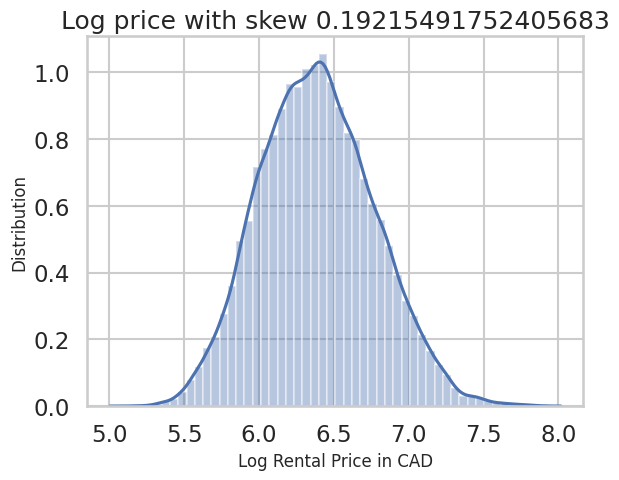

In [100]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.xlabel('Log Rental Price in CAD', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.show()

## Log Price model

In [104]:
log_r_squared_train = np.log(r_squared_train)
log_r_squared_test = np.log(r_squared_test)

print('Training set log R-squared: ', log_r_squared_train)
print('Testing set log R-squared: ', log_r_squared_test)


Training set log R-squared:  -1.106790370747006
Testing set log R-squared:  -1.1242548661342955
